In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [4]:
df = pd.DataFrame(cities)
df = df.rename(columns = {0: "City"})

In [5]:
df['Cloudiness'] = ""
df['Country'] = ""
df['Date'] = ""
df['Humidity'] = ""
df['Lat'] = ""
df['Lng'] = ""
df['Max Temp'] = ""
df['Wind Speed'] = ""
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tautira,,,,,,,,
1,jamestown,,,,,,,,
2,nizhneyansk,,,,,,,,
3,wuhu,,,,,,,,
4,taolanaro,,,,,,,,


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [7]:
query_url = f"{url}appid={api_key}&units={units}&q="
query_url_test = f"{url}appid={api_key}&units={units}"

In [8]:
response = requests.get(query_url +"London").json()
response

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 18.98,
  'pressure': 1015,
  'humidity': 72,
  'temp_min': 17.22,
  'temp_max': 20.56},
 'visibility': 10000,
 'wind': {'speed': 5.7, 'deg': 80},
 'rain': {'3h': 1.938},
 'clouds': {'all': 100},
 'dt': 1561322051,
 'sys': {'type': 1,
  'id': 1414,
  'message': 0.0113,
  'country': 'GB',
  'sunrise': 1561261409,
  'sunset': 1561321303},
 'timezone': 3600,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [9]:
query_url = f"{url}appid={api_key}&units={units}&q="

In [10]:
print("Beginning Data Retrieval \n ---------------------")

for index, row in df.iterrows():
    
    city_name = row["City"]

    # assemble url and make API request
    print(f"Processing Record for Index {index}: {city_name}")
    response = requests.get(query_url + city_name).json()
    
    try: 
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        df.loc[index, 'Country'] = response['sys']['country']
        df.loc[index, 'Date'] = response['dt']
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Lat'] = response['coord']['lat']
        df.loc[index, 'Lng'] = response['coord']['lon']
        df.loc[index, 'Max Temp'] = response['main']['temp_max']
        df.loc[index, 'Wind Speed'] = response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
              
              
print("--------------------- \nData Retrival Complete. \n---------------------")

Beginning Data Retrieval 
 ---------------------
Processing Record for Index 0: tautira
Processing Record for Index 1: jamestown
Processing Record for Index 2: nizhneyansk
City not found... skipping.
Processing Record for Index 3: wuhu
Processing Record for Index 4: taolanaro
City not found... skipping.
Processing Record for Index 5: ancud
Processing Record for Index 6: sentyabrskiy
City not found... skipping.
Processing Record for Index 7: asau
City not found... skipping.
Processing Record for Index 8: rikitea
Processing Record for Index 9: haines junction
Processing Record for Index 10: labuhan
Processing Record for Index 11: seoul
Processing Record for Index 12: kosa
Processing Record for Index 13: busselton
Processing Record for Index 14: qui nhon
City not found... skipping.
Processing Record for Index 15: udachnyy
Processing Record for Index 16: vedea
Processing Record for Index 17: razdolnoye
Processing Record for Index 18: praia da vitoria
Processing Record for Index 19: east lo

Processing Record for Index 185: monrovia
Processing Record for Index 186: teruel
Processing Record for Index 187: clyde river
Processing Record for Index 188: souillac
Processing Record for Index 189: kavaratti
Processing Record for Index 190: pangnirtung
Processing Record for Index 191: mersing
Processing Record for Index 192: leningradskiy
Processing Record for Index 193: mahebourg
Processing Record for Index 194: attawapiskat
City not found... skipping.
Processing Record for Index 195: palmer
Processing Record for Index 196: dikson
Processing Record for Index 197: pacific grove
Processing Record for Index 198: gualeguay
Processing Record for Index 199: warqla
City not found... skipping.
Processing Record for Index 200: yar-sale
Processing Record for Index 201: saint george
Processing Record for Index 202: zeya
Processing Record for Index 203: palabuhanratu
City not found... skipping.
Processing Record for Index 204: saldanha
Processing Record for Index 205: valera
Processing Record

Processing Record for Index 367: mbandaka
Processing Record for Index 368: iranshahr
Processing Record for Index 369: itaqui
Processing Record for Index 370: sao felix do xingu
Processing Record for Index 371: albina
Processing Record for Index 372: labutta
City not found... skipping.
Processing Record for Index 373: bernalillo
Processing Record for Index 374: vaitupu
City not found... skipping.
Processing Record for Index 375: port-cartier
Processing Record for Index 376: mapiripan
Processing Record for Index 377: bacolod
Processing Record for Index 378: ust-kuyga
Processing Record for Index 379: dillon
Processing Record for Index 380: iberia
Processing Record for Index 381: caceres
Processing Record for Index 382: emerald
Processing Record for Index 383: port-de-bouc
Processing Record for Index 384: imeni poliny osipenko
Processing Record for Index 385: asyut
Processing Record for Index 386: chara
Processing Record for Index 387: waipawa
Processing Record for Index 388: guerrero negr

Processing Record for Index 549: el wasta
City not found... skipping.
Processing Record for Index 550: shaoyang
Processing Record for Index 551: haapu
City not found... skipping.
Processing Record for Index 552: orlovskiy
Processing Record for Index 553: samusu
City not found... skipping.
Processing Record for Index 554: denpasar
Processing Record for Index 555: aflu
City not found... skipping.
Processing Record for Index 556: nantucket
Processing Record for Index 557: leh
Processing Record for Index 558: dakar
Processing Record for Index 559: biak
Processing Record for Index 560: springbok
Processing Record for Index 561: orizari
Processing Record for Index 562: juba
Processing Record for Index 563: karratha
Processing Record for Index 564: rio gallegos
Processing Record for Index 565: mumford
Processing Record for Index 566: saint anthony
Processing Record for Index 567: surgut
Processing Record for Index 568: kutum
Processing Record for Index 569: sur
Processing Record for Index 570

In [11]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tautira,75,PF,1561322223,74,-17.73,-149.15,27,1.5
1,jamestown,0,AU,1561322224,69,-33.21,138.6,4.73,7.06
2,nizhneyansk,,,,,,,,
3,wuhu,91,CN,1561322224,83,31.35,118.43,21,2
4,taolanaro,,,,,,,,


In [18]:
df = df.replace('', np.NaN)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tautira,75.0,PF,1.561322e+09,74.0,-17.73,-149.15,27.00,1.50
1,jamestown,0.0,AU,1.561322e+09,69.0,-33.21,138.60,4.73,7.06
2,nizhneyansk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wuhu,91.0,CN,1.561322e+09,83.0,31.35,118.43,21.00,2.00
4,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
today = date.today().strftime('%m/%d/%y')

Text(0.5, 0, 'Latitude')

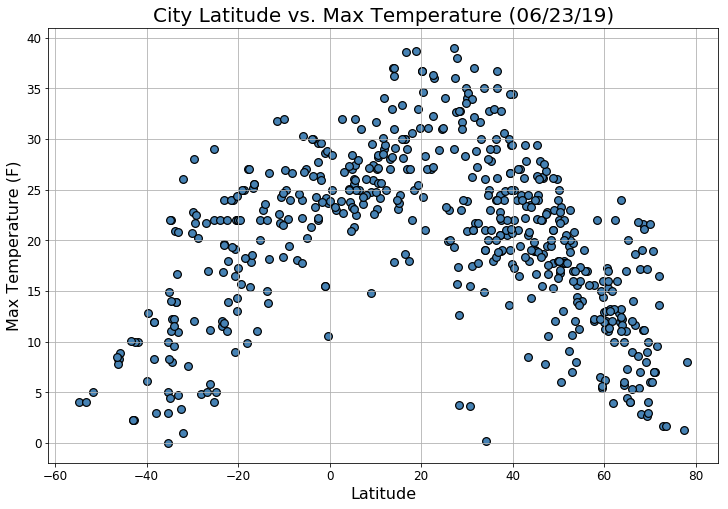

In [96]:
df.plot(kind = "scatter", x = ("Lat"), y = "Max Temp", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Max Temperature ({today})", fontsize = 20)
plt.ylabel("Max Temperature (F)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)

Text(0.5, 0, 'Latitude')

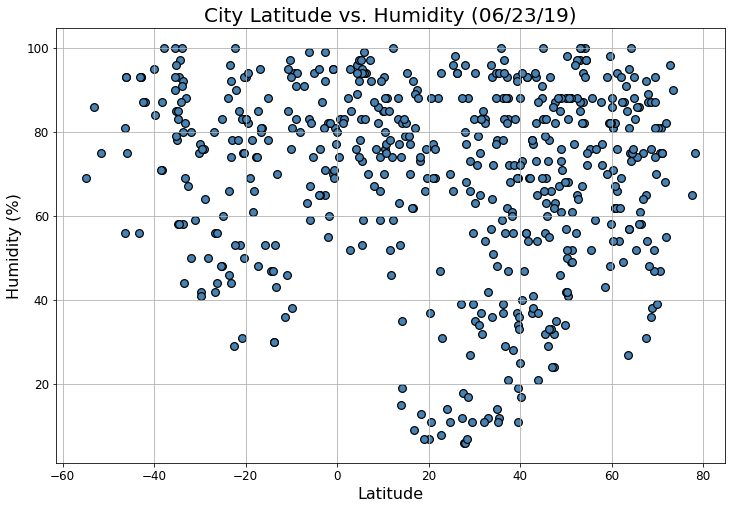

In [97]:
df.plot(kind = "scatter", x = ("Lat"), y = "Humidity", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Humidity ({today})", fontsize = 20)
plt.ylabel("Humidity (%)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)

Text(0.5, 0, 'Latitude')

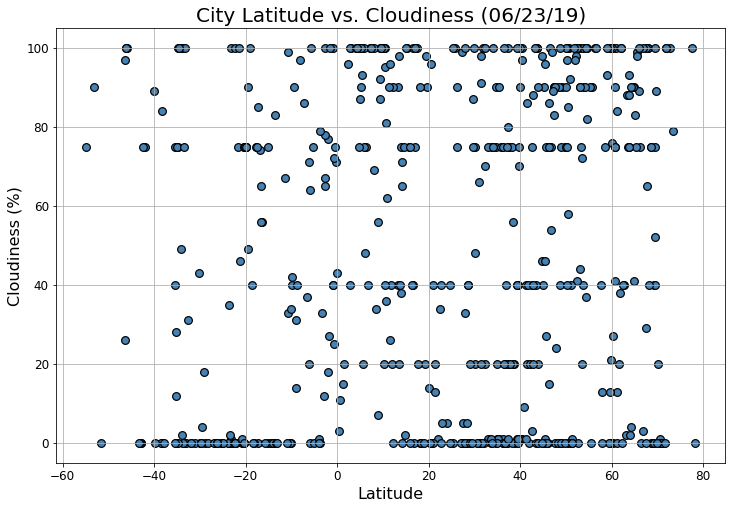

In [100]:
df.plot(kind = "scatter", x = ("Lat"), y = "Cloudiness", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Cloudiness ({today})", fontsize = 20)
plt.ylabel("Cloudiness (%)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)

Text(0.5, 0, 'Latitude')

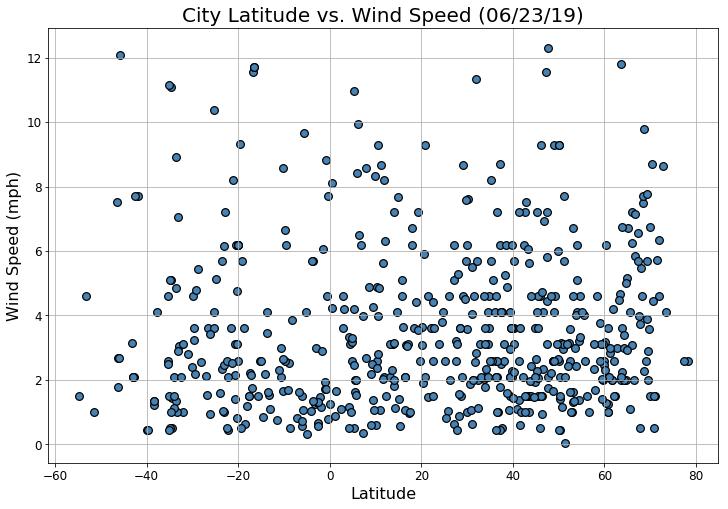

In [101]:
df.plot(kind = "scatter", x = ("Lat"), y = "Wind Speed", c = "steelblue", edgecolors = "Black", s = 60, figsize = (12,8), grid = True, linewidths = 1.2, fontsize = 12)
plt.title(f"City Latitude vs. Wind Speed ({today})", fontsize = 20)
plt.ylabel("Wind Speed (mph)", fontsize = 16)
plt.xlabel("Latitude", fontsize = 16)